# Rapporteksempel: Smittemodellering
_Navn Navnesen_

_Rapport 11.4.2023_

(Nedenfor følger et eksempel på hvordan du kan lage en modelleringsrapport. Rapporten er ikke helt perfekt, men står til høy måloppnåelse - karakteren 5. Spesielt burde det vært mer utforsking og variasjon av ulike parametre (som _a_ og _b_). Eulers metode kunne også vært beskrevet i teoridelen, og det kunne vært mer drøfting og forklaring underveis. Men alt i alt viser rapporten hvordan strukturen og oppsettet på din rapport bør være).

## 1. Hensikt
Vi skal her utforske ulike modeller for smitteutvikling. Smittemodellering kan være nyttig for å forutsi smitte ved årlige sykdomsforløp, slik som influensa, og for å undersøke effekten av ulike tiltak, slik som vaksinasjon.

## 2. Teori
Vi ser her på tre ulike modeller for smittespredning.

### Modell 1
Vi starter med en smittespredningsmodell er der ingen blir friske av den smittsomme sykdommen. Da antar vi at antall smittede utvikler seg slik:

$$I_{n+1}=I_n+aI_n$$

Her er _I_ antall smittede (infected) og _a_ er en parameter som bestemmer spredningsraten. Smitteraten _a_ kan variere med blant annet sykdommens spredningsmønster, hvor smittsom spredningen er, hvilke tiltak vi har i samfunnet (hygiene, munnbind, kontaktmønster), befolkningstetthet og mobilitet.

### Modell 2
Vi kan utvide modellen vår og innføre en ny kategori av individer som er mottakelige for smitte. Vi kaller dem _S_ (susceptibles).

Vi kan anta at de smittede da utvikler seg slik.

$$I_{n+1}=I_n+aI_nS_n$$

Her multipliserer vi de smittede med de mottakelige for å simulere hendelsen der et smittet individ møter et mottakelig individ og kan overføre smitten. Hvorvidt smitten overføres eller ikke, bestemmes av _a_. Siden smittede individer ikke lenger er mottakelige, kan de mottakelige individene beskrives slik:

$$S_{n+1}=S_n-aI_nS_n$$

### Modell 3
La oss deretter utforske en modell som også tar hensyn til at det går an å bli frisk fra sykdommen. Da innfører vi en kategori til, nemlig de friske og tidligere smittede. Disse har da immunitet og kan ikke bli smittet igjen. Vi kaller dem _R_ ("recovered"), og de kan beskrives slik:

$$R_{n+1}=R_n+bI_n$$

Da må de smittede utvikle seg slik:

$$I_{n+1}=I_n+aS_nI_n-bI_n$$

Antall usmittede, men mottakelige individer, _S_, må fortsatt følge denne modellen:

$$S_{n+1}=S_n-aI_nS_n$$

Disse tre likningene utgjør det vi kaller "SIR-modellen" for smitteutvikling. Parameteren _b_ beskriver her _bedringsraten_, altså hvor stor andel av de smittede som blir friske, beskrevet av leddet $b\cdot I_n$. Bedringsraten kommer an på sykdommen som spres, og hvor fort folk blir friske av sykdommen.

## 3. Resultater og drøfting
Vi ser på tre modellene for seg, og plotter resultatene gitt bestemte verdier av parameterne _a_ og _b_. Først importerer vi nødvendige biblioteker:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Modell 1

Vi starter med å se på den enkleste modellen, som forutsetter at ingen dør eller blir friske, og/eller at det ikke finnes noen immunitet mot sykdommen.

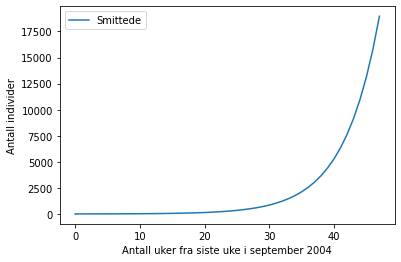

In [7]:
N = 157759 # Populasjonsstørrelse
a = 0.2 # Kontaktrate per uke
tid_slutt = 48 # Antall uker vi ønsker å simulere

# Startverdier
I = 3 # Antall smittede til å begynne med

# Lister for å spare på verdiene
smittede = [I]
t = [0]

for tid in range(tid_slutt):
    I = I + a*I # Modellen
    smittede.append(I)
    t.append(tid)

plt.plot(t,smittede,label='Smittede')
plt.xlabel('Antall uker fra siste uke i september 2004')
plt.ylabel('Antall individer')
plt.legend() # Viser merkelapper
plt.show()

Modellen sier at antall smittede individer ved neste tidssteg er lik antall smittede individer ved forrige tidssteg + en viss andel (_a_) av antall individer som sprer smitten videre.

Modellen forutsetter enten at det ikke er noen immunitet innenfor smittemengden, altså at ingen smittede møter på personer som allerede er smittet. Det kan være et realistisk bilde i en stor populasjon i begynnelsen av et smitteforløp. Det er derfor usannsynlig at modellen beskriver utvikling langt fram i tid. Modellen forutsetter også at ingen blir friske i løpet av den tiden vi ser på. Igjen peker dette på at modellen kun kan gjelde for et kort tidsrom.

### Modell 2

Vi utvider modellen ved å legge til en kategori for mottakelige individer, altså individer som kan få sykdommen.

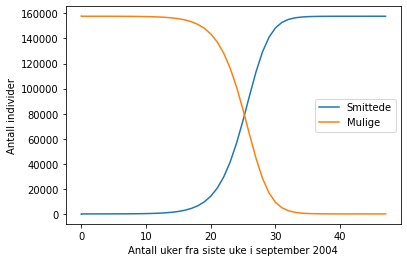

In [8]:
N = 157759     # Populasjonsstørrelse
a = 0.5/N       # Kontaktrate
tid_slutt = 48       # Antall uker vi ønsker å simulere

# Startverdier
I = 3       # Antall smittede til å begynne med
S = N-I     # Antall usmittede til å begynne med

# Lister for å spare på verdiene
mulige = [S]
smittede = [I]
t = [0]

for i in range(tid_slutt):
    # Lager variabelen endring for å ikke endre I eller S før ny I eller S beregnes
    endring = a*S*I 
    I = I + endring
    S = S - endring
    # Legger inn verdier i listene
    smittede.append(I)
    mulige.append(S)
    t.append(i)
    
plt.plot(t,smittede,label='Smittede')
plt.plot(t,mulige,label='Mulige')
plt.xlabel('Antall uker fra siste uke i september 2004')
plt.ylabel('Antall individer')
plt.legend() # Viser merkelapper
plt.show()

I modellen blir alle smittet, og ingen blir friske. Modellen er derfor lite egna til å studere smitteutvikling, verken over kort tid (individene smittes for langsomt) eller over lang tid (individene blir aldri friske), med mindre vi har å gjøre med en sykdom som gir betydelige langtidsvirkninger.

Modellen sier at antall mottakelige er lik antall mottakelige ved forrige tidssteg minus andelen som er smittet.  Årsaken til at vi også ganger inn de mottakelige her, er at smittespredningen nå avhenger av både mottakelige og de som allerede er smittet. At vi multipliserer disse faktorene er ikke nødvendigvis det eneste rette. Det kan vise seg at modellen avhenger enda mer av antall mottakelige enn smittede. Da kan vi for eksempel kvadrere antall mottakelige i modellen:

$$I_{n+1}=I_n+aI_nS_n^2$$

Husk at dette er modeller, og at det ofte er flere muligheter for å lage en modell som beskriver et system. Vi har ennå ikke validert modellen vår.

### Modell 3

Den siste modellen vi skal se på, innfører en kategori for friskmeldte, og dermed immune, individer.

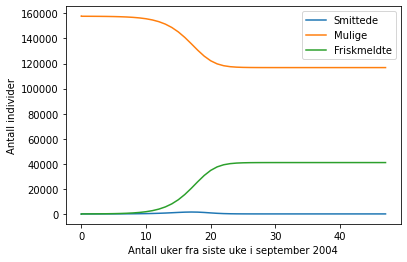

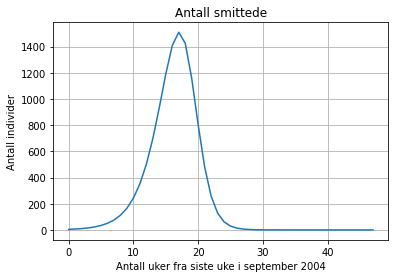

1509


In [9]:
N = 157759 # Populasjonsstørrelse
a = 4/N # Kontaktrate
b = 3.5 # Bedringsrate
tid_slutt = 48 # Antall uker vi ønsker å simulere

# Startverdier
I = 3 # Antall smittede til å begynne med
S = N-I # Antall usmittede til å begynne med
R = 0

# Lister for å spare på verdiene
mulige = [S]
smittede = [I]
friskmeldte = [R]
t = [0]

for i in range(tid_slutt):
    endring_smittede = a*S*I
    endring_friske = b*I
    I = I + endring_smittede - endring_friske
    S = S - endring_smittede
    R = R + endring_friske
    # Legger inn verdier i listene
    smittede.append(I)
    mulige.append(S)
    friskmeldte.append(R)
    t.append(i)

plt.plot(t,smittede,label='Smittede')
plt.plot(t,mulige,label='Mulige')
plt.plot(t,friskmeldte,label='Friskmeldte')
plt.xlabel('Antall uker fra siste uke i september 2004')
plt.ylabel('Antall individer')
plt.legend() # Viser merkelapper
plt.show()

plt.title('Antall smittede')
plt.xlabel('Antall uker fra siste uke i september 2004')
plt.ylabel('Antall individer')
plt.plot(t,smittede)
plt.grid()
plt.show()

print(int(max(smittede)))

Vi tar utgangspunkt i denne modellen og sammenlikner de smittede med et datasett som viser antall smittede i en influensasesong. Vi justerer _a_ og _b_ slik at de passer best mulig med dataene.

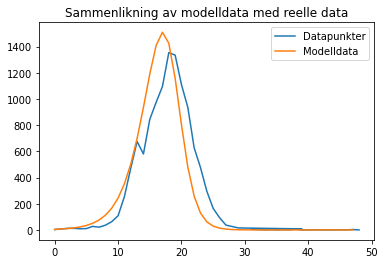

In [11]:
N = 157759     # Populasjonsstørrelse
a = 4/N      # Kontaktrate
b =  3.5        # Bedringsrate
tid_slutt = 48 # Antall uker vi ønsker å simulere

# Startverdier
I = 3       # Antall smittede til å begynne med
S = N-I     # Antall usmittede til å begynne med
R = 0

# Lister for å spare på verdiene
mulige = [S]
smittede = [I]
friskmeldte = [R]
t = [0]

for i in range(tid_slutt):
    endring_smittede = a*S*I
    endring_friske = b*I
    # Legg inn likningene her
    I = I + endring_smittede - endring_friske
    S = S - endring_smittede
    R = R + endring_friske
    # Legger inn verdier i listene
    smittede.append(I)
    mulige.append(S)
    friskmeldte.append(R)
    t.append(i)

# Les og plott dataene her
data = pd.read_csv('influensa.txt', skiprows=2,delimiter=',')
uke = data["uker"]
smittede_data = data["infiserte"]

plt.plot(uke, smittede_data, label = 'Datapunkter')
plt.plot(t, smittede, label = 'Modelldata')
plt.title('Sammenlikning av modelldata med reelle data')
plt.legend()
plt.show()

Modell 3 viser et forløp der antall smittede øker sakte i starten, og raskere fram til ca. uke 13. Da snur trenden, og antall smittede går nedover fra ca. uke 17. Det er maksimalt 1509 smittede i populasjonen på samme tid. Etter at antall smittede har nådd 0 (ca. uke 27), har vi ifølge modellen oppnådd flokkimmunitet, eller influensasesongen er over, og ingen flere individer blir smittet. Merk at modellen forutsetter at ingen dør av sykdommen, noe som ikke stemmer helt med influensa. Det er derimot ofte ganske få døde i forhold til befolkningen, så modellen gir uansett et godt estimat på hvor mange som er smittet til enhver tid i løpet av sesongen.

Vi validerer modellen og tilpasser parameterne ved hjelp av datasettet som viser antall smittede i en populasjon på $N = 157 759$ testede individer. Den best tilpassede kurven får vi for $a \approx 4/N$ og $b \approx 3.5$. Siden dataene og modellen beskriver et vanlig influensavirus som kommer igjen hver høst i omtrent samme variant, kan modellen brukes til å estimere smittsomhet og sykdomstopper også for neste sesong. Parameterne i modellen, spesielt smitteraten, må likevel tilpasses sosiale og helsemessige forhold i den aktuelle populasjonen, f.eks. befolkningstetthet, generell hygiene og levestandard.

### 5. Konklusjon
Vi har modellert ulike forløp for spredning av smitte ved hjelp av tre ulike smittemodeller med ulik kompleksitet. Modellene er validert ved å utføre parameterjustering med grunnlag i et reellt datasett som beskriver smitte

Vi kan utvide modellen ved å innføre en kategori for døde, i tillegg til en vaksineringseffekt, der vi starter med at en viss andel av populasjonen er immune ved sykdommens start.